 DATA SET : Concrete Compressive Strength
INPUT VARIABLES=8
OUTPUT VARIABLE=1
TARGET VARIABLE IS Concrete Compressive Strength

# IMPORTS THE NECESSARY LIBRARIES





In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
# allow plots to appear directly in the notebook
%matplotlib inline

# **GETTING THE DATA**

In [ ]:
data = pd.read_csv("/content/Concrete_Data.csv")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.shape

(1030, 9)

TOTAL OBSERVATIONS ARE 1030 AND 9 FEATURES

In [ ]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


SIMPLIFYING COLUMN NAMES,SINCE THEY APPEAR TO BE TOO LENGTHY

In [ ]:
data= data.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Furnace_Slag', 
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'Water', 
    
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer', 
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_agg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_agg', 
    'Age (day)':'Age', 
    'Concrete compressive strength(MPa, megapascals) ': 'Cc_Strength'})

data

,Cement,Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_agg,Fine_agg,Age,Cc_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
data.columns

Index(['Cement', 'Furnace_Slag', 'Fly_Ash', 'Water', 'Super_Plasticizer',
       'Coarse_agg', 'Fine_agg', 'Age', 'Cc_Strength'],
      dtype='object')

# **DATA CLEANING**

CHECKING FOR NULL VALUES

In [ ]:
data.isnull().sum()

Cement               0
Furnace_Slag         0
Fly_Ash              0
Water                0
Super_Plasticizer    0
Coarse_agg           0
Fine_agg             0
Age                  0
Cc_Strength          0
dtype: int64

We can find that the given data doesn't have any NULL values, Thus it is considered as clean data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1030 non-null   float64
 1   Furnace_Slag       1030 non-null   float64
 2   Fly_Ash            1030 non-null   float64
 3   Water              1030 non-null   float64
 4   Super_Plasticizer  1030 non-null   float64
 5   Coarse_agg         1030 non-null   float64
 6   Fine_agg           1030 non-null   float64
 7   Age                1030 non-null   int64  
 8   Cc_Strength        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# **OUTLIER PREDICTIONS**

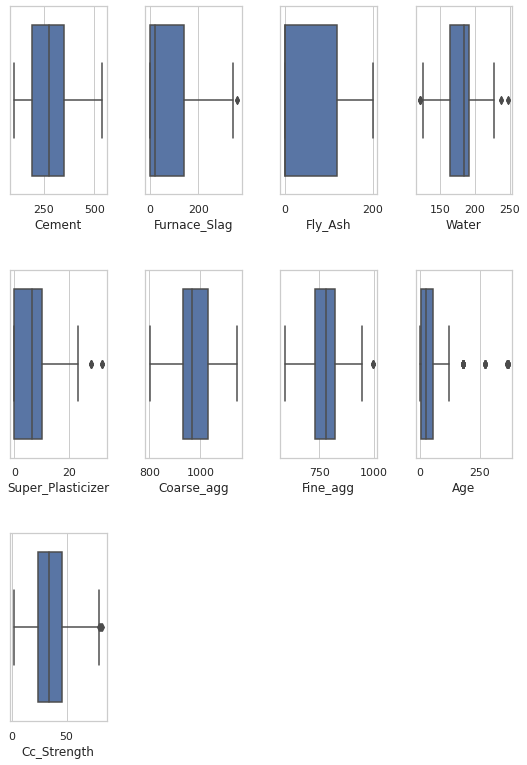

In [ ]:
plt.figure(figsize =(9,18))
n = 0
sns.set(style="whitegrid")
for i in data:
    n += 1
    plt.subplot(4,4,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = data[i])
plt.show()

**So we see few outliers in our dataset**

**Outlier Elimination**

In [ ]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

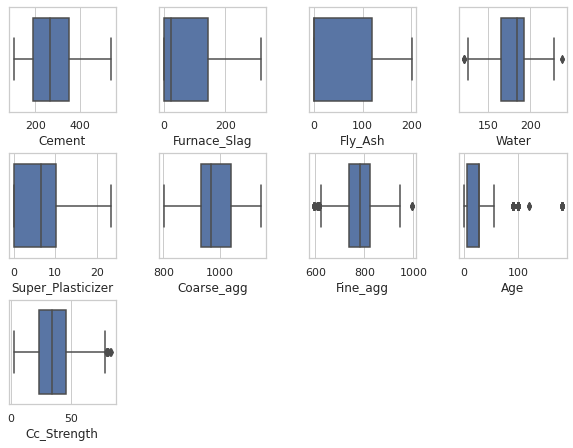

In [ ]:
plt.figure(figsize =(10,10))
n = 0
sns.set(style="whitegrid")
for i in data:
    n += 1
    plt.subplot(4,4,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = data[i])
plt.show()

# **EDA (EXPLORATORY DATA ANALYSIS)**

Exploring the DATA

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,981.0,277.489399,102.594951,102.00,190.30,266.00,349.0,540.0
Furnace_Slag,981.0,73.106218,85.197793,0.00,0.00,22.00,144.2,316.1
Fly_Ash,981.0,56.749745,64.439192,0.00,0.00,0.00,118.3,200.1
Water,981.0,180.760041,20.139643,121.80,164.90,184.00,192.0,237.0
Super_Plasticizer,981.0,6.194495,5.486470,0.00,0.00,6.70,10.3,23.4
Coarse_agg,981.0,974.729256,77.765000,801.00,932.00,968.00,1038.0,1145.0
Fine_agg,981.0,776.003976,77.651828,594.00,739.00,780.00,822.2,992.6
Age,981.0,36.448522,36.871075,1.00,7.00,28.00,28.0,180.0
Cc_Strength,981.0,35.294220,16.733154,2.33,23.22,33.69,45.3,82.6


In [ ]:
data.corr()

,Cement,Furnace_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_agg,Fine_agg,Age,Cc_Strength
Cement,1.000000,-0.266328,-0.389618,-0.071321,0.030318,-0.092010,-0.237042,0.030073,0.485174
Furnace_Slag,-0.266328,1.000000,-0.334016,0.105951,0.067628,-0.293014,-0.277048,-0.051423,0.149047
Fly_Ash,-0.389618,-0.334016,1.000000,-0.256133,0.430345,-0.027427,0.059940,-0.054422,-0.081538
Water,-0.071321,0.105951,-0.256133,1.000000,-0.642165,-0.202194,-0.400566,0.115496,-0.327835
Super_Plasticizer,0.030318,0.067628,0.430345,-0.642165,1.000000,-0.239669,0.163481,-0.080760,0.384011
Coarse_agg,-0.092010,-0.293014,-0.027427,-0.202194,-0.239669,1.000000,-0.187816,0.022298,-0.158351
Fine_agg,-0.237042,-0.277048,0.059940,-0.400566,0.163481,-0.187816,1.000000,-0.036370,-0.162665
Age,0.030073,-0.051423,-0.054422,0.115496,-0.080760,0.022298,-0.036370,1.000000,0.432874
Cc_Strength,0.485174,0.149047,-0.081538,-0.327835,0.384011,-0.158351,-0.162665,0.432874,1.000000


Checking Pairwise Relations

In [ ]:
corrMatrix = data[data.columns[0:]].corr()['Cc_Strength'][:-1]
corrMatrix = corrMatrix.to_frame()

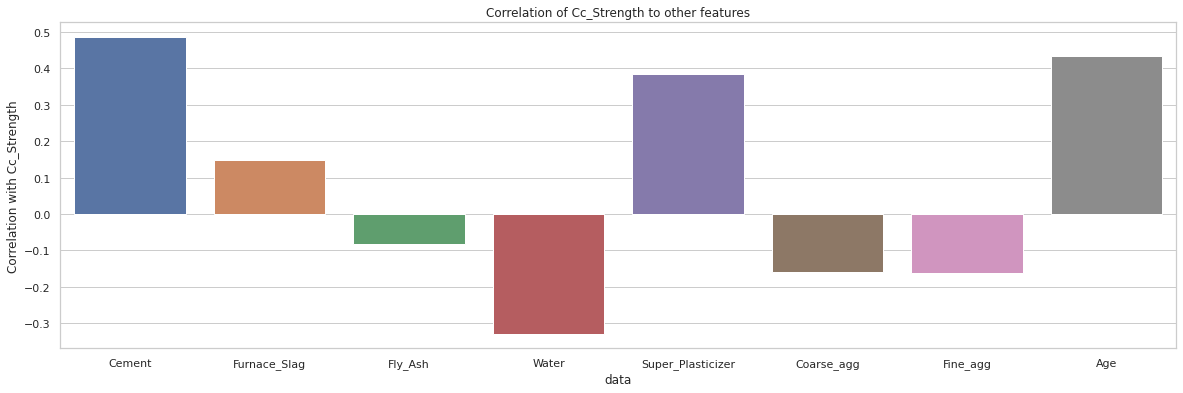

,Cc_Strength
Cement,0.485174
Furnace_Slag,0.149047
Fly_Ash,-0.081538
Water,-0.327835
Super_Plasticizer,0.384011
Coarse_agg,-0.158351
Fine_agg,-0.162665
Age,0.432874


In [ ]:
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = corrMatrix.index,y = corrMatrix['Cc_Strength'],data = corrMatrix)
plt.title('Correlation of Cc_Strength to other features')
plt.ylabel('Correlation with Cc_Strength')
plt.xlabel('data')
plt.show()
corrMatrix

In [ ]:
c=data.groupby(["Age"])["Cc_Strength"].median()

In [ ]:
c

Age
1       9.455
3      15.615
7      21.170
14     26.540
28     33.760
56     51.430
90     39.680
91     67.950
100    46.985
120    39.380
180    40.905
Name: Cc_Strength, dtype: float64

[Text(0, 0.5, 'Strength'),
 Text(0.5, 1.0, 'Strength Of Concrete Vs Age of Cement')]

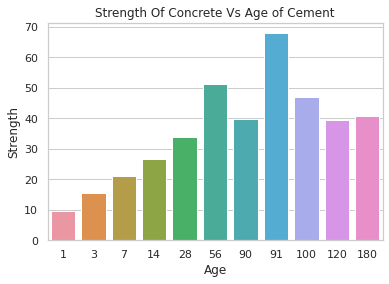

In [ ]:
sns.barplot(x=c.index,y=c.values).set(title="Strength Of Concrete Vs Age of Cement",ylabel="Strength")

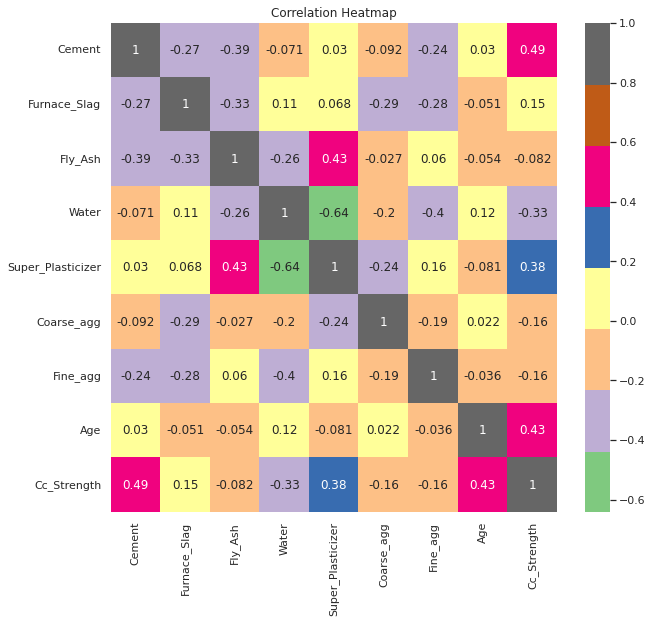

In [ ]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True, cmap='Accent')
plt.title("Correlation Heatmap")
plt.show()

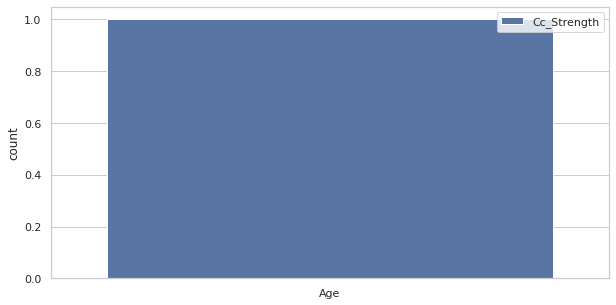

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=['Age'],hue=['Cc_Strength'])

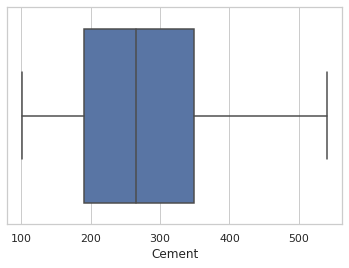

In [ ]:
sns.boxplot(x=data["Cement"])

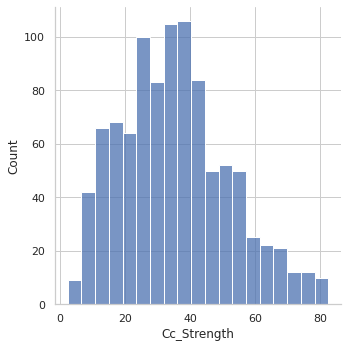

In [ ]:
sns.displot(data['Cc_Strength'])

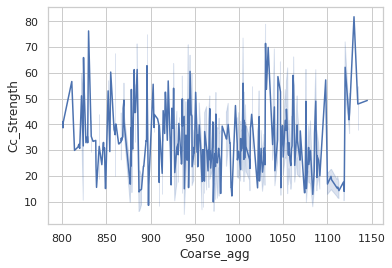

In [ ]:
figsize=(100,90)
sns.lineplot(x='Coarse_agg',y='Cc_Strength',data=data)

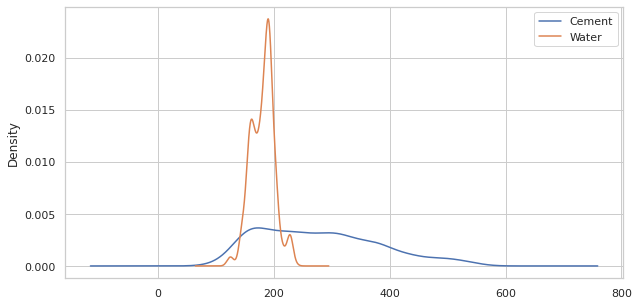

In [ ]:
df = pd.DataFrame(data,columns=['Cement','Water','Cc_Strength'])
df.plot(x='Cc_Strength',y=['Cement','Water'],kind='kde',figsize=(10,5))
plt.show()

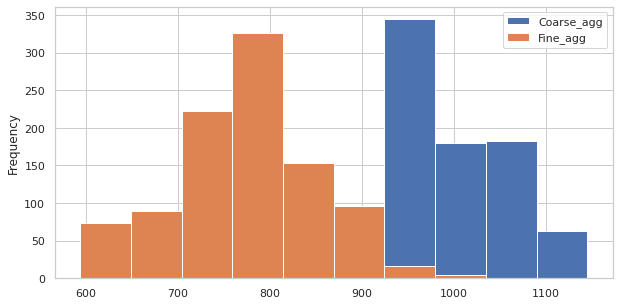

In [ ]:
df = pd.DataFrame(data,columns=['Coarse_agg','Fine_agg','Cc_Strength'])
df.plot(x='Cc_Strength',y=['Coarse_agg','Fine_agg'],kind='hist',figsize=(10,5))
plt.show()

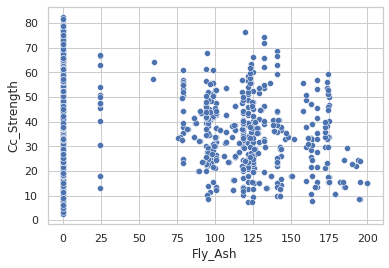

In [ ]:
sns.scatterplot(x='Fly_Ash',y='Cc_Strength',data=data)

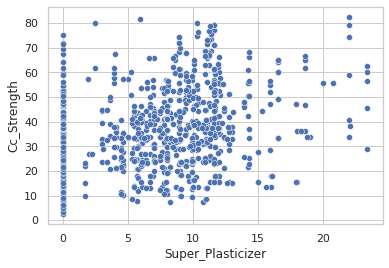

In [ ]:
sns.scatterplot(x='Super_Plasticizer',y='Cc_Strength',data=data)

Multivariate Analysis

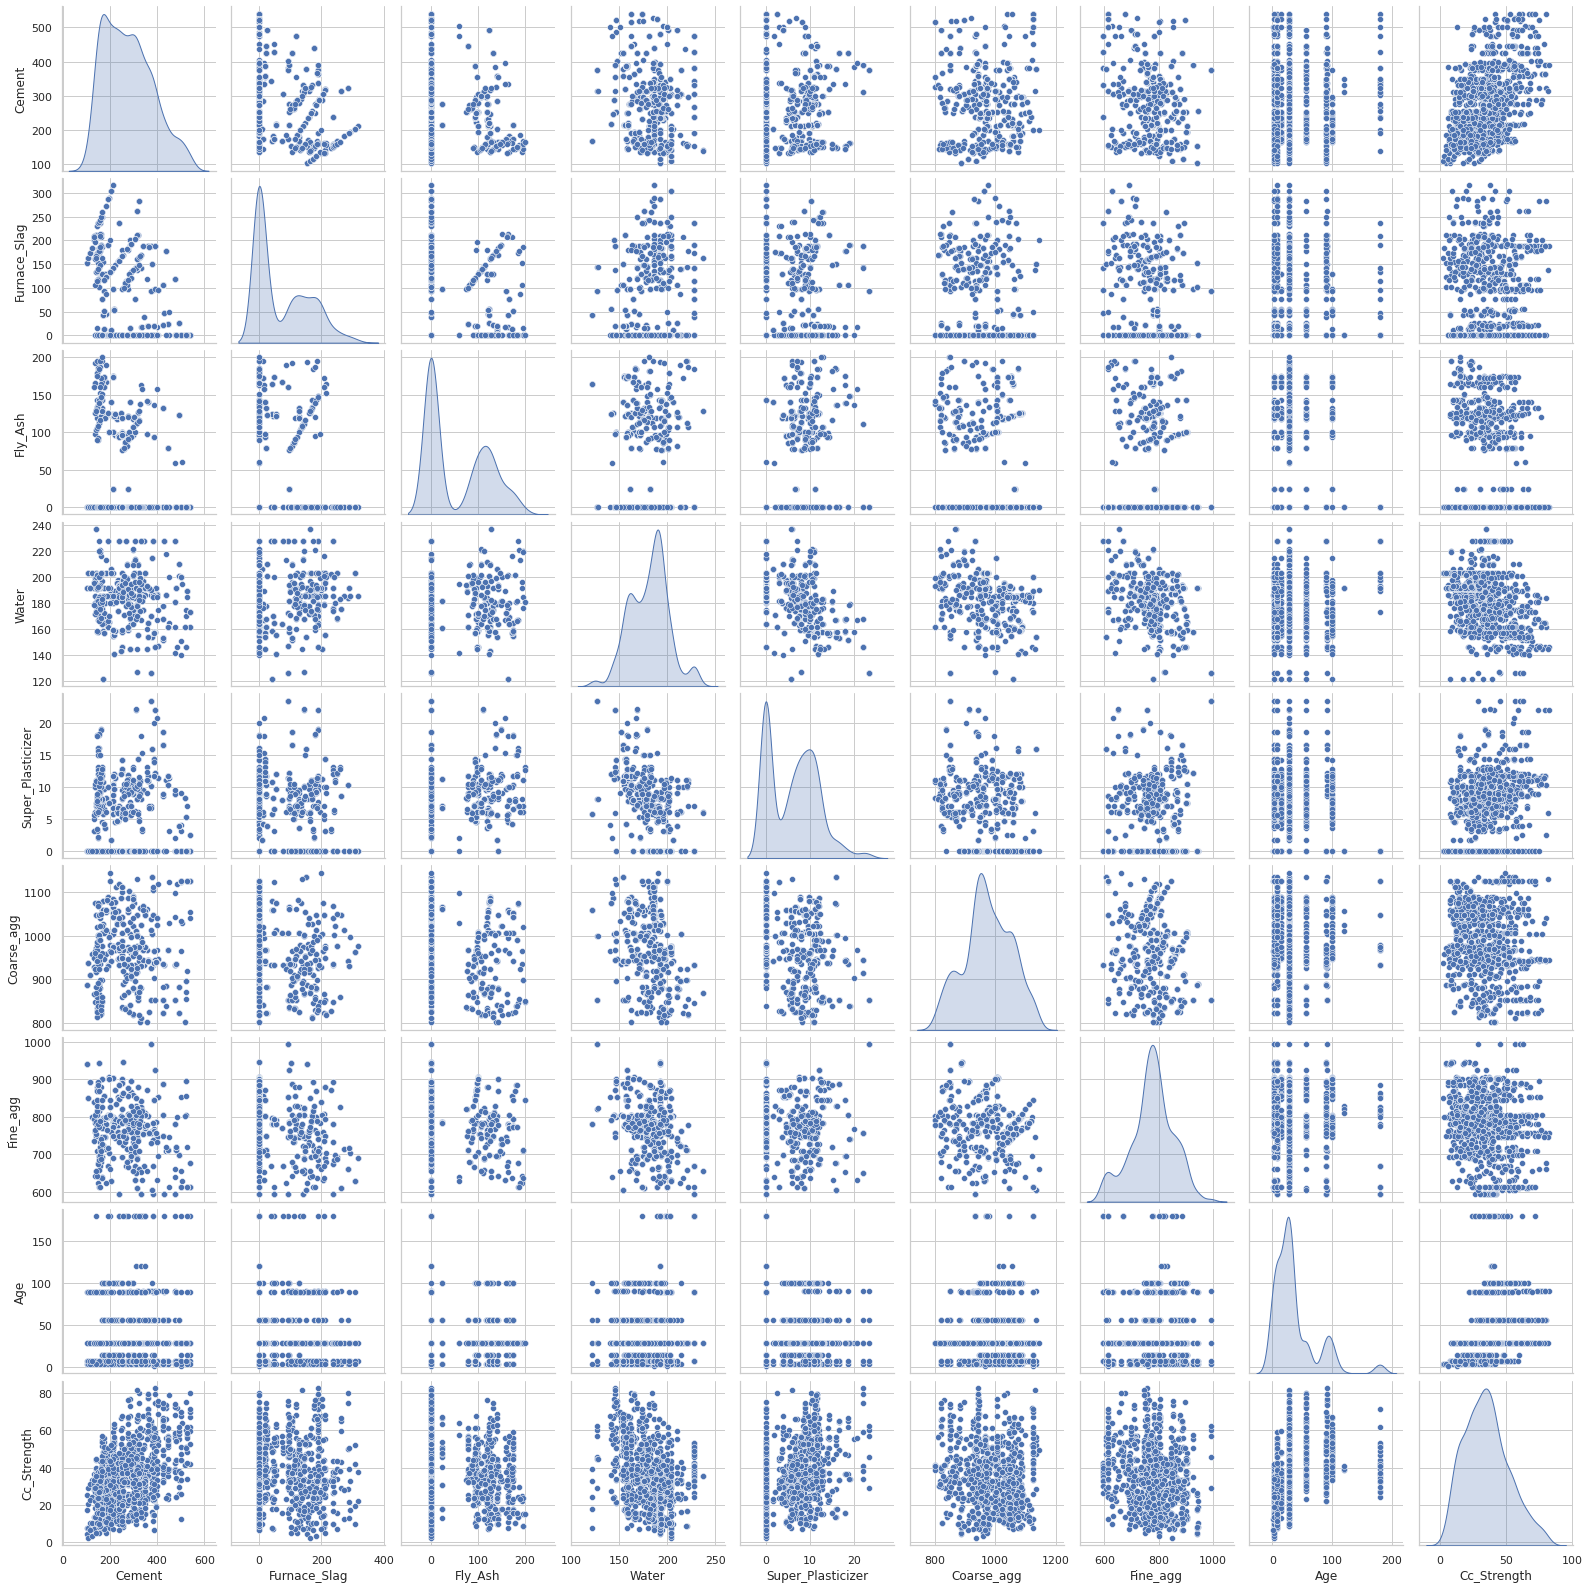

In [ ]:
sns.pairplot(data, diag_kind="kde")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


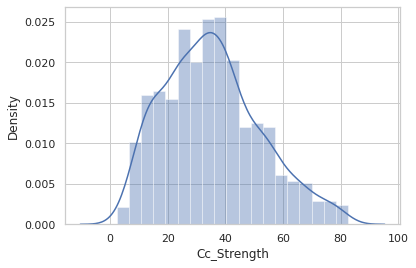

In [ ]:
sns.distplot(data['Cc_Strength'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


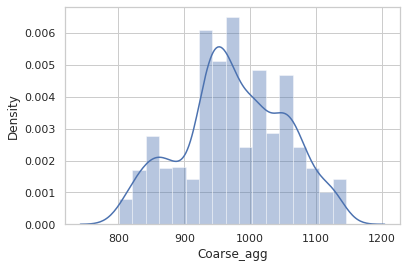

In [ ]:
sns.distplot(data['Coarse_agg'])

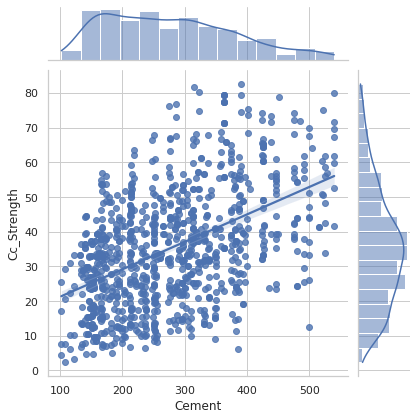

In [ ]:
sns.jointplot(x="Cement", y="Cc_Strength", data=data[["Cement", "Cc_Strength"]], kind="reg")

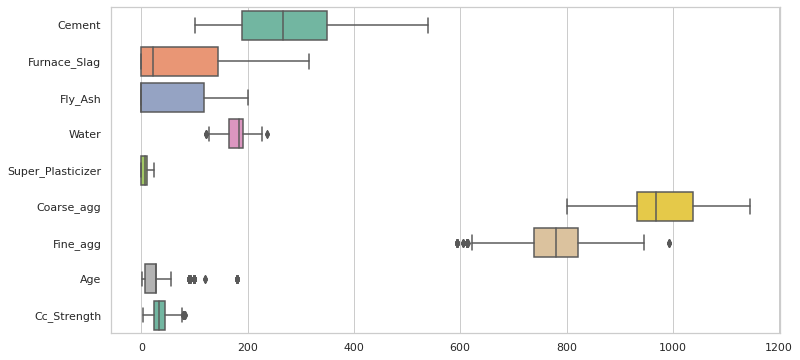

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, orient="h", palette="Set2", dodge=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


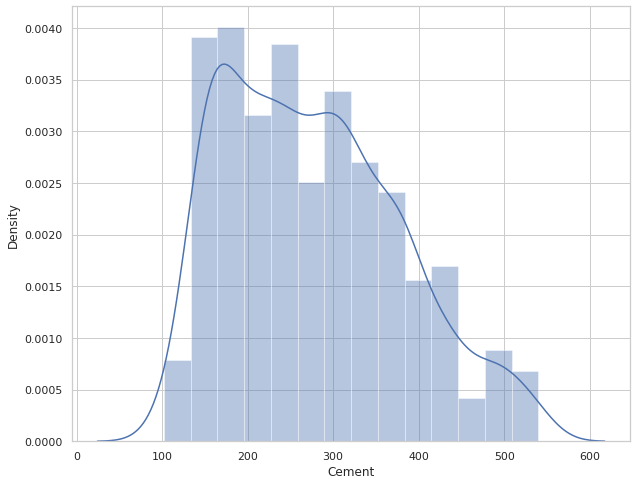

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


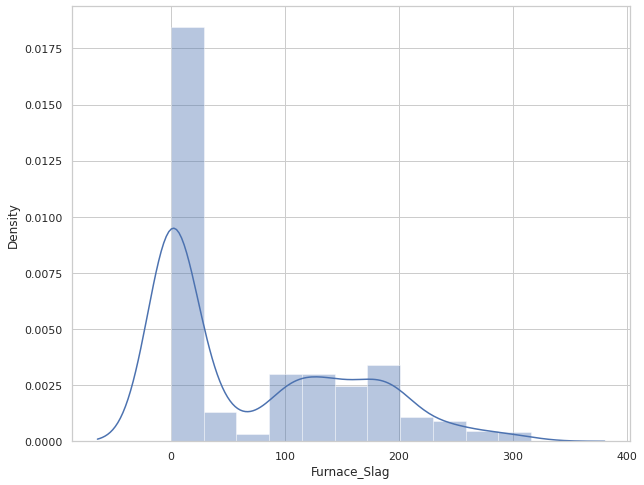

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


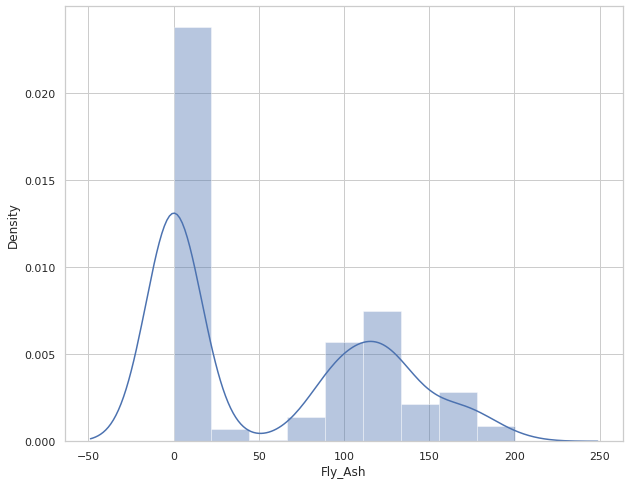

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


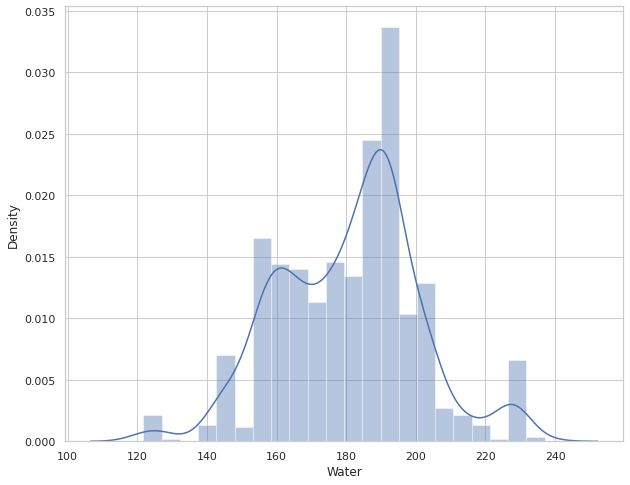

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


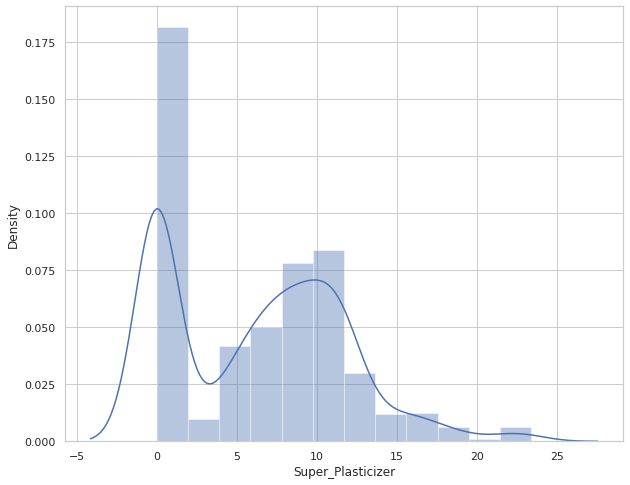

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


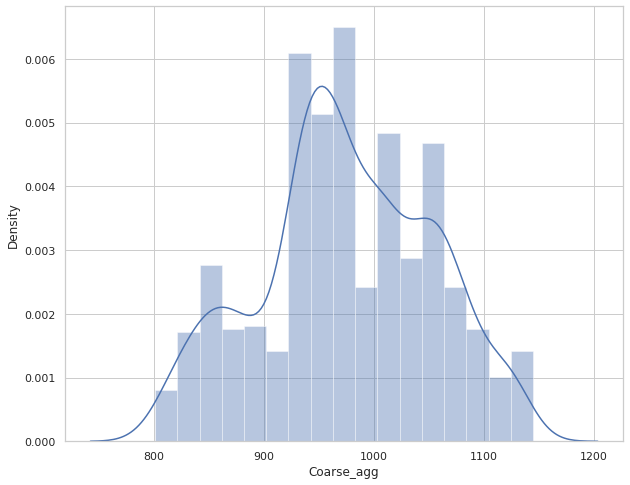

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


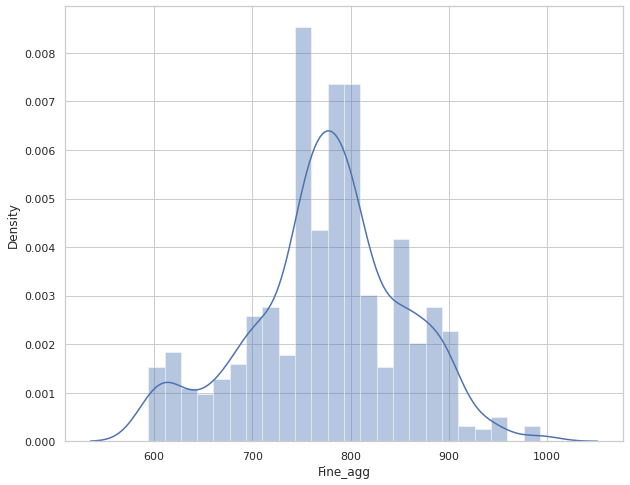

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


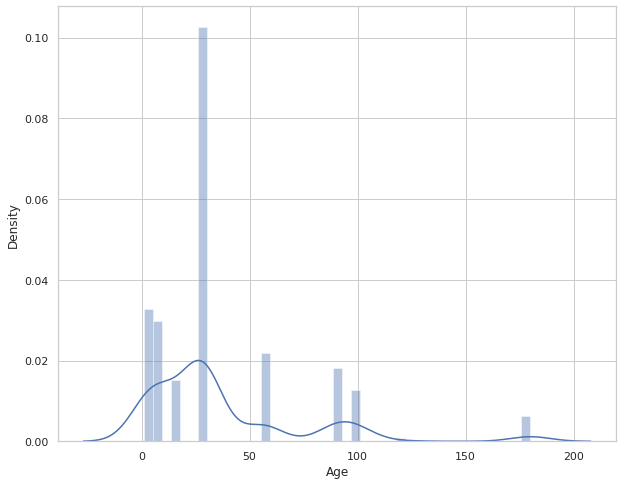

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


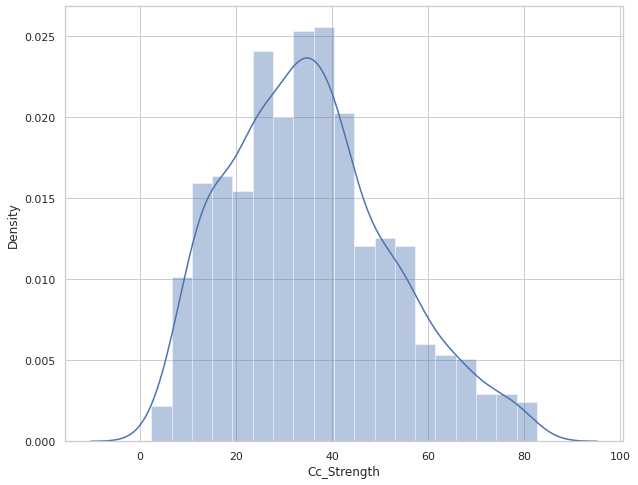

In [ ]:
for col in data.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(data[col])
    plt.show()

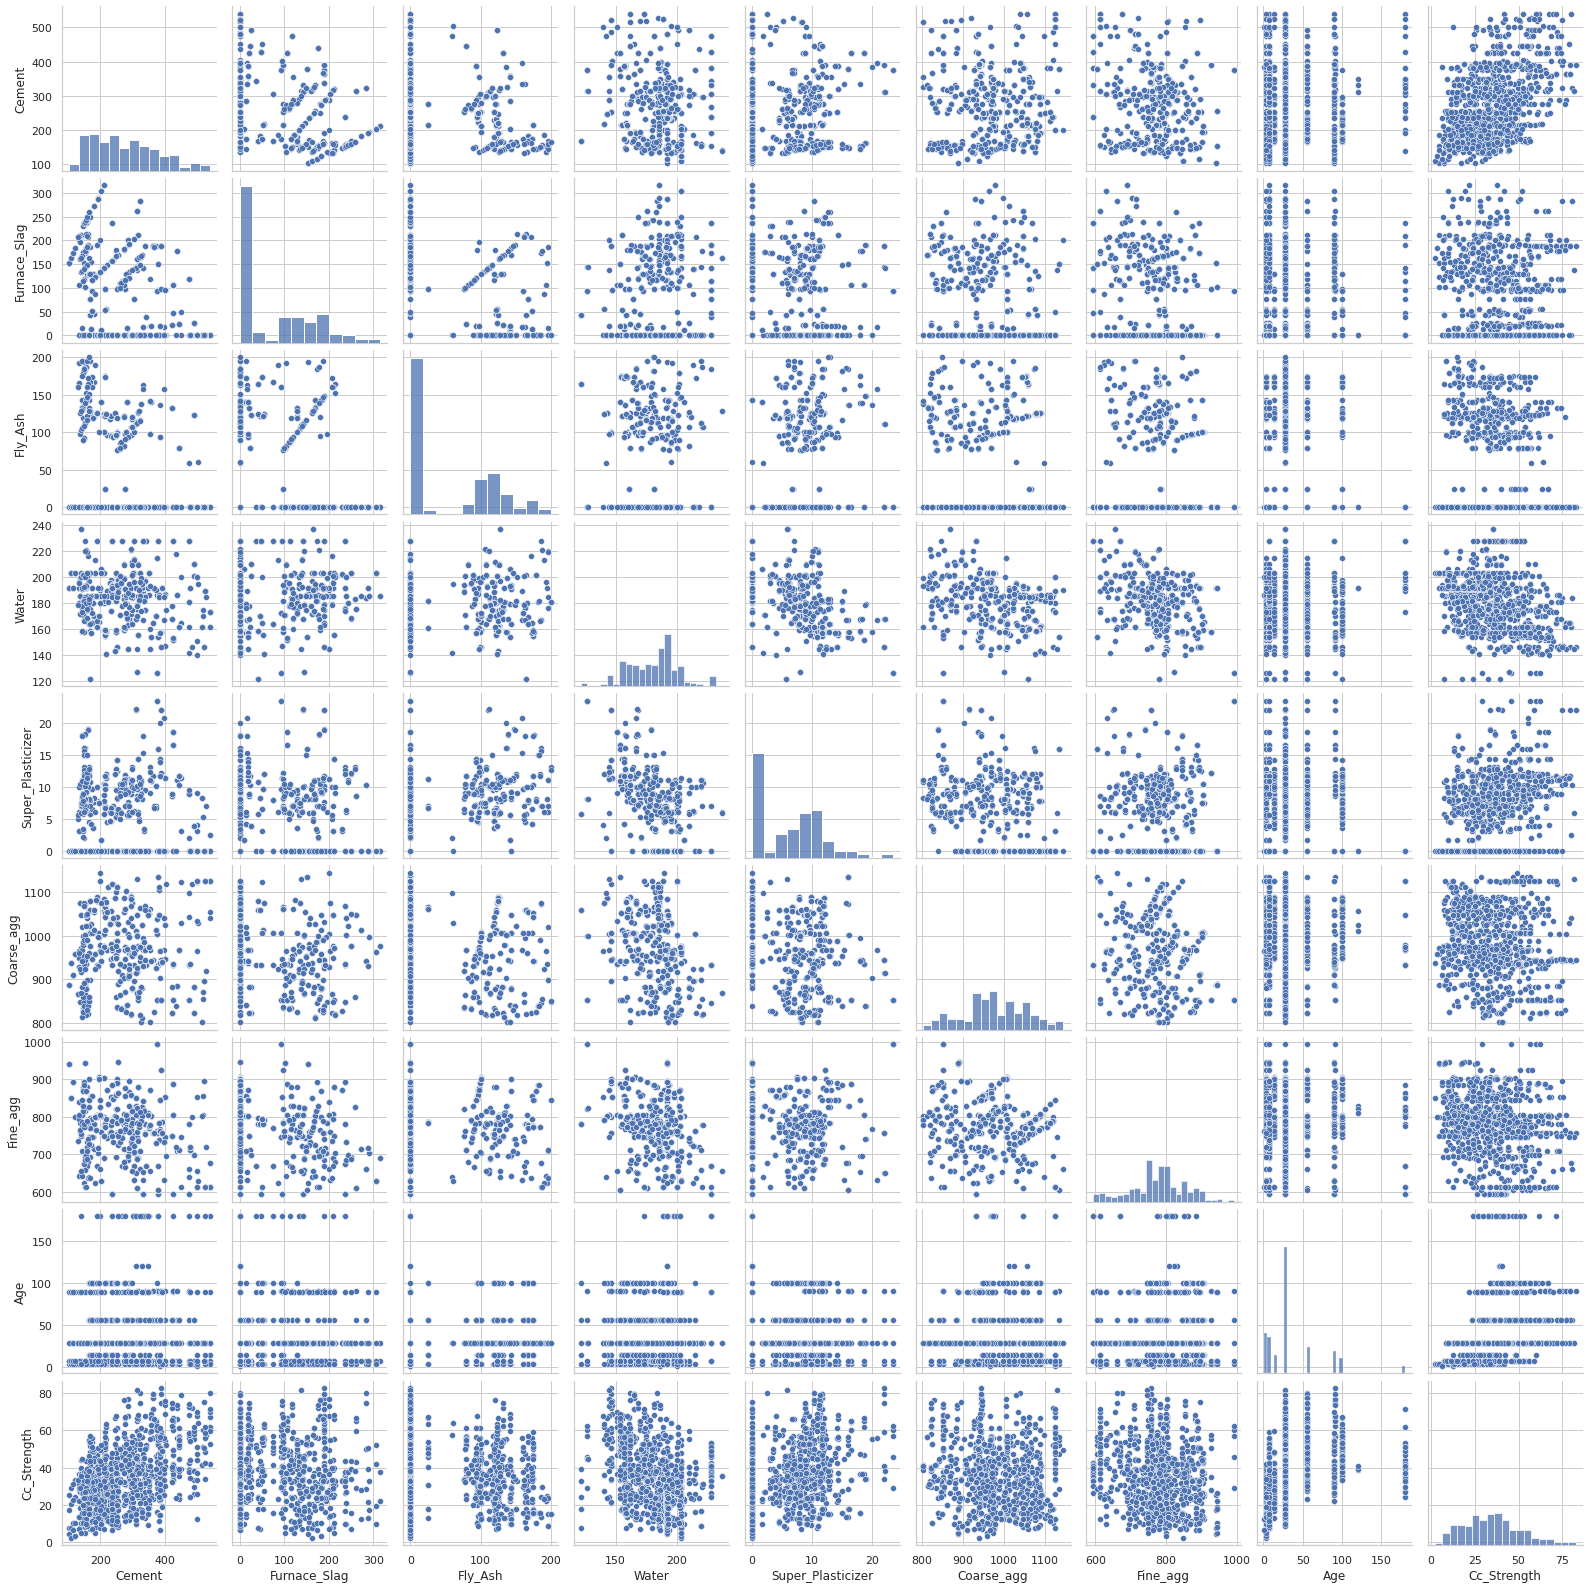

In [ ]:
sns.pairplot( data )

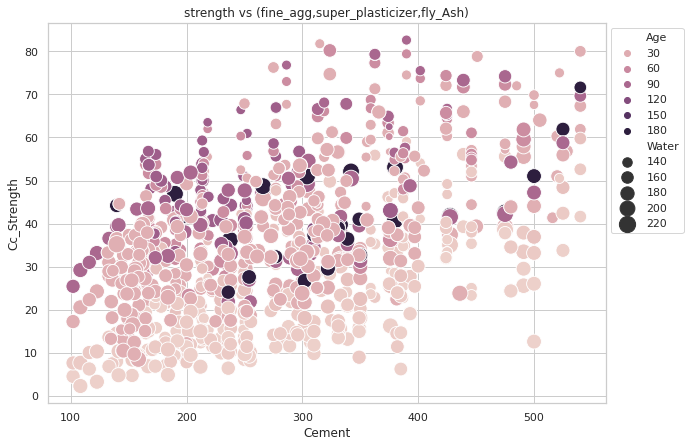

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y="Cc_Strength", x="Cement", hue="Age", size="Water", data=data, ax=ax, sizes=(50, 300))
ax.set_title("strength vs (fine_agg,super_plasticizer,fly_Ash)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

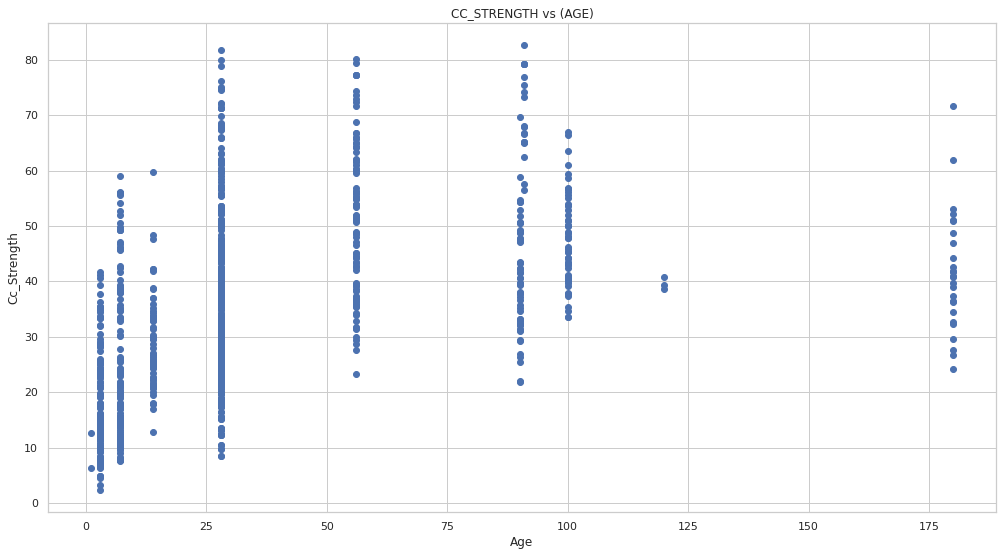

In [ ]:
plt.figure(figsize=[17,9])
plt.scatter(y='Cc_Strength', x='Age', data=data)
plt.title("CC_STRENGTH vs (AGE)")
plt.ylabel('Cc_Strength')
plt.xlabel('Age')
plt.show()

# **MODELLING (FITTING THE DATA MODEL) LINEAR REGRESSION**

In this program, x contains the list of independent variables, and y contains the dependent variable in this case:

1. Independent variables are cement, flyash, water, superplasticizer, coaseseaggregate, fineaggregate, age.

2. dependent variable is the only strength

**Train Test**

In [ ]:
# independent variables
x = data.drop(['Cc_Strength'],axis=1)
# dependent variables
y = data['Cc_Strength']

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [ ]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predicted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predicted score is : 0.6274149341125665
..................................
mean_sqrd_error is == 98.88461880768921
root mean squared error is == 9.944074557629243


ANOTHER method

In [ ]:
lm=smf.ols(formula='Cc_Strength~Cement+Furnace_Slag+Fly_Ash+Water+Super_Plasticizer+Coarse_agg+Fine_agg+Age',data=data).fit()
lm.params

Intercept           -5.849784
Cement               0.116883
Furnace_Slag         0.099225
Fly_Ash              0.075248
Water               -0.175276
Super_Plasticizer    0.334326
Coarse_agg           0.009991
Fine_agg             0.011598
Age                  0.221111
dtype: float64

In [ ]:
x=data[['Cement','Furnace_Slag','Fly_Ash','Water','Super_Plasticizer','Coarse_agg','Fine_agg','Age']]
y=data.Cc_Strength
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
lm1=LinearRegression()
lm1.fit(x_train,y_train)
y_pred=lm1.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

9.31327930865747


In [ ]:
lm.rsquared

0.7054154207867094

In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

-12.088640519384242
[ 0.11852343  0.09747226  0.07445466 -0.15018771  0.37741295  0.00980777
  0.01316616  0.22624936]


In [ ]:
lm1.score(x_test,y_test)

0.6750372586368611

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Cc_Strength   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     290.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          7.41e-252
Time:                        10:45:52   Log-Likelihood:                -3555.9
No. Observations:                 981   AIC:                             7130.
Df Residuals:                     972   BIC:                             7174.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.8498     23.753     -0.246      0.806     -52.464      40.764
Cement                0.1169      0.008     15.377      0.000       0.102       0.132
Furnace_Slag          0.0992      0.009     10.750      0.000       0.081       0.117
Fly_Ash               0.0752      0.011      6.578      0.000       0.053       0.098
Water                -0.1753      0.036     -4.882      0.000      -0.246      -0.105
Super_Plasticizer     0.3343      0.091      3.671      0.000       0.156       0.513
Coarse_agg            0.0100      0.008      1.187      0.235      -0.007       0.027
Fine_agg              0.0116      0.010      1.209      0.227      -0.007       0.030
Age                   0.2211      0.008     27.677      0.000       0.205       0.237
==============================================================================
Omnibus:                       14.662   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.343
Skew:                          -0.155   Prob(JB):                     3.82e-05
Kurtosis:                       3.633   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Linear regression 2**

In [ ]:
# independent variables
x1 = data.drop(['Cc_Strength'],axis=1)
# dependent variables
y1 = data['Cc_Strength']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.2, random_state=42)
y1_test

836    33.42
529    68.75
170    57.60
607    18.42
90     40.60
       ...  
482    56.14
363    63.53
934    22.93
561    33.08
514    74.36
Name: Cc_Strength, Length: 197, dtype: float64

In [ ]:
lm=LinearRegression()
lm.fit(x1_train,y1_train)
y1_pred=lm.predict(x1_test)

In [ ]:
mae=metrics.mean_absolute_error(y1_test,y1_pred)
print(mae)

7.384207195613036


**Linear regression 3**

In [ ]:
x2 = data.drop(['Cc_Strength'],axis=1)
# dependent variables
y2 = data['Cc_Strength']

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size=0.4, random_state=23)
y2_test

819    58.78
341    47.40
424    33.01
840    45.30
419    16.88
       ...  
800    13.71
490    34.77
254    13.54
346    40.15
832    19.99
Name: Cc_Strength, Length: 393, dtype: float64

In [ ]:
lm=LinearRegression()
lm.fit(x2_train,y2_train)
y2_pred=lm.predict(x2_test)

In [ ]:
mae=metrics.mean_absolute_error(y2_test,y2_pred)
print(mae)

7.088558392248468


linear regression method 4

In [ ]:
x3 = data.drop(['Cc_Strength'],axis=1)
# dependent variables
y3 = data['Cc_Strength']

In [ ]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size=0.3, random_state=23)
y3_test

819    58.78
341    47.40
424    33.01
840    45.30
419    16.88
       ...  
411    23.08
951    19.01
580    21.86
693    17.96
922    33.80
Name: Cc_Strength, Length: 295, dtype: float64

In [ ]:
lm=LinearRegression()
lm.fit(x3_train,y3_train)
y3_pred=lm.predict(x3_test)

In [ ]:
mae=metrics.mean_absolute_error(y3_test,y3_pred)
print(mae)

6.872863071821377


# **NEURAL NETWORK**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=40)
y_test

307    51.04
271    33.73
504    29.55
95     49.20
59     33.02
       ...  
702    17.17
859    15.09
167    74.19
108    47.10
220    25.48
Name: Cc_Strength, Length: 197, dtype: float64

In [ ]:
tf.random.set_seed(40)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(24),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 20000, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 7.2458 - mae: 7.2458


[7.245832443237305, 7.245832443237305]